# 初始化算法

载入一些必备的库：

In [1]:
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg', 'pdf')

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.datasets import make_moons

save_dir = '../data/images'

## 创建一个简单的数据集

利用 `make_moons` 生成一个半月形数据集。

In [2]:
n = 800   # 样本数
n_labeled = 10 # 有标签样本数
X, Y = make_moons(n, shuffle=True, noise=0.1, random_state=1000)

X.shape, Y.shape

((800, 2), (800,))

In [3]:
def one_hot(Y, n_classes):
    '''
    对标签做 one_hot 编码
    
    参数
    =====
    Y: 从 0 开始的标签
    n_classes: 类别数
    '''
    out = Y[:, None] == np.arange(n_classes)
    return out.astype(float)

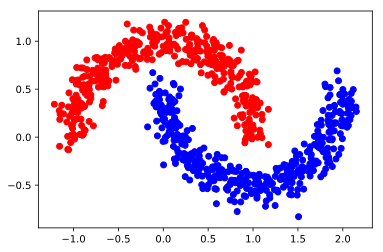

In [4]:
color = ['red' if l == 0 else 'blue' for l in Y]
plt.scatter(X[:, 0], X[:, 1], color=color)
plt.savefig(f"{save_dir}/bi_classification.pdf", format='pdf')
plt.show()

Y_input = np.concatenate((one_hot(Y[:n_labeled], 2), np.zeros((n-n_labeled, 2))))

# 算法过程

## Step 1: 创建相似度矩阵 W

In [5]:
def rbf(x, sigma):
    return np.exp((-x)/(2* sigma**2))

In [6]:
sigma = 0.2
dm = cdist(X, X, 'euclidean')
vfunc = np.vectorize(rbf)
vfunc = np.vectorize(rbf)
W = vfunc(dm, sigma)
np.fill_diagonal(W, 0)   # 对角线全为 0

## Step 2: 计算 S

$$
S = D^{\frac{1}{2}} W D^{\frac{1}{2}}
$$

In [7]:
def calculate_S(W):
    d = np.sum(W, axis=1)
    D = np.sqrt(d*d[:, np.newaxis])
    return np.divide(W, D, where=D != 0)


S = calculate_S(W)

## 迭代一次的结果

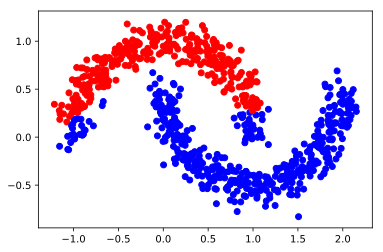

In [8]:
alpha = 0.99
F = np.dot(S, Y_input)*alpha + (1-alpha)*Y_input

Y_result = np.zeros_like(F)
Y_result[np.arange(len(F)), F.argmax(1)] = 1

Y_v = [1 if x == 0 else 0 for x in Y_result[0:,0]]

color = ['red' if l == 0 else 'blue' for l in Y_v]
plt.scatter(X[0:,0], X[0:,1], color=color)
#plt.savefig("iter_1.pdf", format='pdf')
plt.show()

## Step 3: 迭代  F "n_iter" 次直到收敛

In [9]:
n_iter = 400

for t in range(n_iter):
    F = np.dot(S, F)*alpha + (1-alpha)*Y_input

## Step 4:  画出最终结果

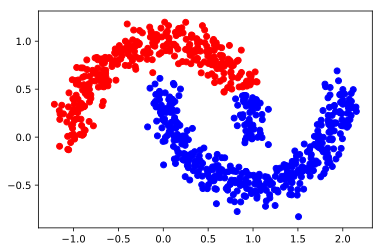

In [10]:
Y_result = np.zeros_like(F)
Y_result[np.arange(len(F)), F.argmax(1)] = 1

Y_v = [1 if x == 0 else 0 for x in Y_result[0:,0]]

color = ['red' if l == 0 else 'blue' for l in Y_v]
plt.scatter(X[0:,0], X[0:,1], color=color)
#plt.savefig("iter_n.pdf", format='pdf')
plt.show()